# Load dataset

In [32]:
import pandas as pd
import numpy as np

melanoma_records = pd.read_csv('Melanoma TFRecords 256x256.csv') # loaded as dataframe
melanoma_records.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height,patient_code
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,0,6000,4000,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,0,6000,4000,1
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,6,1872,1053,2
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,0,1872,1053,3
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,11,6000,4000,4


In [33]:
melanoma_records.shape

(33126, 12)

# Handle missing values

In [34]:
melanoma_records.isnull().sum() 

image_name                         0
patient_id                         0
sex                               65
age_approx                        68
anatom_site_general_challenge    527
diagnosis                          0
benign_malignant                   0
target                             0
tfrecord                           0
width                              0
height                             0
patient_code                       0
dtype: int64

In [35]:
null_sex = melanoma_records[melanoma_records['sex'].isnull()]
null_sex.isnull().sum() 

image_name                        0
patient_id                        0
sex                              65
age_approx                       65
anatom_site_general_challenge     0
diagnosis                         0
benign_malignant                  0
target                            0
tfrecord                          0
width                             0
height                            0
patient_code                      0
dtype: int64

#### We see that all null values of sex have null ages too. Age and sex are necessary factors for melanoma diagnosis. 
#### Hence, dropping all rows with null sex values.

In [36]:
melanoma_records = melanoma_records[melanoma_records['sex'].notnull()]
melanoma_records.isnull().sum() 

image_name                         0
patient_id                         0
sex                                0
age_approx                         3
anatom_site_general_challenge    527
diagnosis                          0
benign_malignant                   0
target                             0
tfrecord                           0
width                              0
height                             0
patient_code                       0
dtype: int64

In [37]:
# we see now only 3 rows have null age

male = melanoma_records[melanoma_records['sex']=='male']
female = melanoma_records[melanoma_records['sex']=='female']
# male.isnull().sum()
female.isnull().sum() 

image_name                         0
patient_id                         0
sex                                0
age_approx                         3
anatom_site_general_challenge    235
diagnosis                          0
benign_malignant                   0
target                             0
tfrecord                           0
width                              0
height                             0
patient_code                       0
dtype: int64

In [38]:
from sklearn.impute import SimpleImputer

# as all 3 null ages belong to female, we fill them with average value of female ages

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(female[['age_approx']])

melanoma_records['age_approx'] = impute.transform(melanoma_records[['age_approx']])
melanoma_records.isnull().sum() 

image_name                         0
patient_id                         0
sex                                0
age_approx                         0
anatom_site_general_challenge    527
diagnosis                          0
benign_malignant                   0
target                             0
tfrecord                           0
width                              0
height                             0
patient_code                       0
dtype: int64

# Encoding

In [39]:
melanoma_records['sex'].unique()

array(['male', 'female'], dtype=object)

In [40]:
# Encoding sex as male-->0 and female-->1

if not isinstance(melanoma_records['sex'][0], (int, np.integer)):
    melanoma_records['sex'] = melanoma_records['sex'].map({'male':0,'female':1}) 

In [41]:
melanoma_records['anatom_site_general_challenge'].unique()

array(['head/neck', 'upper extremity', 'lower extremity', 'torso', nan,
       'palms/soles', 'oral/genital'], dtype=object)

In [42]:
from sklearn.preprocessing import LabelEncoder

# # encoding anatom_site_general_challenge 
# using one-hot encoding

anatom_site_general_challenge_enc = pd.get_dummies(melanoma_records['anatom_site_general_challenge'])
melanoma_records = pd.concat([melanoma_records, anatom_site_general_challenge_enc], axis=1)

In [43]:
melanoma_records['diagnosis'].unique()

array(['unknown', 'nevus', 'melanoma', 'seborrheic keratosis',
       'lentigo NOS', 'lichenoid keratosis', 'solar lentigo',
       'cafe-au-lait macule', 'atypical melanocytic proliferation'],
      dtype=object)

In [44]:
# encoding diagnosis 

if not isinstance(melanoma_records['diagnosis'][0], (int, np.integer)):
    melanoma_records['diagnosis'] = melanoma_records['diagnosis'].map({'unknown': 0, 'nevus': 1, 'melanoma':2, 
        'seborrheic keratosis':3, 'lentigo NOS':4, 'lichenoid keratosis':5, 'solar lentigo':6,
        'cafe-au-lait macule':7, 'atypical melanocytic proliferation':8}) 

In [45]:
melanoma_records['benign_malignant'].unique()

array(['benign', 'malignant'], dtype=object)

In [46]:
# encoding benign_malignant with values --> 0,1

enc = LabelEncoder()
melanoma_records['benign_malignant'] = enc.fit_transform(melanoma_records['benign_malignant'])

In [47]:
melanoma_records.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height,patient_code,head/neck,lower extremity,oral/genital,palms/soles,torso,upper extremity
0,ISIC_2637011,IP_7279968,0,45.0,head/neck,0,0,0,0,6000,4000,0,1,0,0,0,0,0
1,ISIC_0015719,IP_3075186,1,45.0,upper extremity,0,0,0,0,6000,4000,1,0,0,0,0,0,1
2,ISIC_0052212,IP_2842074,1,50.0,lower extremity,1,0,0,6,1872,1053,2,0,1,0,0,0,0
3,ISIC_0068279,IP_6890425,1,45.0,head/neck,0,0,0,0,1872,1053,3,1,0,0,0,0,0
4,ISIC_0074268,IP_8723313,1,55.0,upper extremity,0,0,0,11,6000,4000,4,0,0,0,0,0,1


# Scaling

In [48]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
melanoma_records[['age_approx', 'tfrecord', 'width', 'height', 'patient_code']] = scaler.fit_transform(melanoma_records[['age_approx', 'tfrecord', 'width', 'height', 'patient_code']])

melanoma_records.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height,patient_code,head/neck,lower extremity,oral/genital,palms/soles,torso,upper extremity
0,ISIC_2637011,IP_7279968,0,0.500000,head/neck,0,0,0,0.066667,1.000000,0.637681,0.000000,1,0,0,0,0,0
1,ISIC_0015719,IP_3075186,1,0.500000,upper extremity,0,0,0,0.066667,1.000000,0.637681,0.000487,0,0,0,0,0,1
2,ISIC_0052212,IP_2842074,1,0.555556,lower extremity,1,0,0,0.466667,0.229851,0.103804,0.000973,0,1,0,0,0,0
3,ISIC_0068279,IP_6890425,1,0.500000,head/neck,0,0,0,0.066667,0.229851,0.103804,0.001460,1,0,0,0,0,0
4,ISIC_0074268,IP_8723313,1,0.611111,upper extremity,0,0,0,0.800000,1.000000,0.637681,0.001946,0,0,0,0,0,1


# Features and Labels

In [49]:
melanoma_records_corr = melanoma_records.corr()
melanoma_records_corr.head()

,sex,age_approx,diagnosis,benign_malignant,target,tfrecord,width,height,patient_code,head/neck,lower extremity,oral/genital,palms/soles,torso,upper extremity
sex,1.000000,-0.109832,-0.042921,-0.028623,-0.028623,-0.025961,0.048670,0.050337,0.013975,-0.015497,0.054100,-0.014792,-0.017300,-0.066995,0.048802
age_approx,-0.109832,1.000000,0.107961,0.086389,0.086389,0.019479,0.092855,0.089232,0.100780,0.057856,0.008321,-0.019266,-0.033693,-0.010402,-0.010342
diagnosis,-0.042921,0.107961,1.000000,0.453740,0.453740,0.002161,-0.304247,-0.310253,0.200589,0.018412,0.000783,-0.014975,-0.037671,0.019269,-0.020644
benign_malignant,-0.028623,0.086389,0.453740,1.000000,1.000000,0.002368,-0.074530,-0.063828,0.061959,0.041366,-0.012850,0.006798,-0.003522,-0.018473,0.014999
target,-0.028623,0.086389,0.453740,1.000000,1.000000,0.002368,-0.074530,-0.063828,0.061959,0.041366,-0.012850,0.006798,-0.003522,-0.018473,0.014999


<AxesSubplot:>

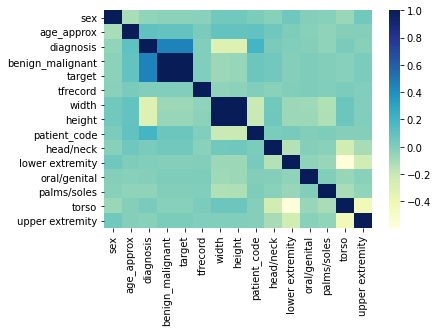

In [50]:
import seaborn as sns

sns.heatmap(melanoma_records_corr, cmap = 'YlGnBu')

#### From intuition we can guess that based on the patient details, we need to predict the diagnosis

#### So, features are the patient details and target labels are the diagnosis 

##### We are ignoring patient_code and target columns

In [51]:
data = np.array([list(melanoma_records['sex']), list(melanoma_records['age_approx']), list(melanoma_records['tfrecord']), 
                 list(melanoma_records['width']), list(melanoma_records['height']), list(melanoma_records['head/neck']), 
                 list(melanoma_records['lower extremity']), list(melanoma_records['oral/genital']), 
                 list(melanoma_records['palms/soles']), list(melanoma_records['torso']), 
                 list(melanoma_records['upper extremity']), list(melanoma_records['benign_malignant'])])

data = np.transpose(data) # so each row contains values of all 12 features in 12 columns 

melanoma_dataset = {
    'feature_values' : data,
    
    'feature_names' : np.array(['sex', 'age_approx', 'tfrecord', 'width', 'height', 'head/neck', 'lower extremity',
                   'oral/genital', 'palms/soles', 'torso', 'upper extremity','benign_malignant']),
        
    'target': np.array(list(melanoma_records['diagnosis'])),
    
    'target_labels' : np.array(['unknown', 'nevus', 'melanoma', 'seborrheic keratosis','lentigo NOS', 'lichenoid keratosis',
                    'solar lentigo', 'cafe-au-lait macule', 'atypical melanocytic proliferation'])
}
melanoma_dataset

{'feature_values': array([[0.        , 0.5       , 0.06666667, ..., 0.        , 0.        ,
         0.        ],
        [1.        , 0.5       , 0.06666667, ..., 0.        , 1.        ,
         0.        ],
        [1.        , 0.55555556, 0.46666667, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.22222222, 0.26666667, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.55555556, 0.8       , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.5       , 0.33333333, ..., 1.        , 0.        ,
         0.        ]]),
 'feature_names': array(['sex', 'age_approx', 'tfrecord', 'width', 'height', 'head/neck',
        'lower extremity', 'oral/genital', 'palms/soles', 'torso',
        'upper extremity', 'benign_malignant'], dtype='<U16'),
 'target': array([0, 0, 1, ..., 0, 0, 1]),
 'target_labels': array(['unknown', 'nevus', 'melanoma', 'seborrheic keratosis',
        'lentigo NOS', 'lichenoid keratosis', '

## Using logistic regression

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Prepare the training set

X = melanoma_dataset['feature_values']
y = melanoma_dataset['target']

In [53]:
#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the model
model = LogisticRegression()
model.fit(x_train, y_train) #Training the model
predictions = model.predict(x_test)
print(predictions)# printing predictions

[0 1 0 ... 0 0 0]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Accuracy score:

In [54]:
logisticRegression_accuracy = accuracy_score(y_test, predictions)
print(logisticRegression_accuracy )

0.8572508694994707


## Using Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier


X = melanoma_dataset['feature_values']
y = melanoma_dataset['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)


clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

### Accuracy score:

In [56]:
decisionTree_accuracy=accuracy_score(y_pred,y_test)
print(decisionTree_accuracy)

0.9079086647512475


## Visualizing the tree

In [57]:
X_new = pd.DataFrame(X, columns = ['sex', 'age_approx', 'tfrecord', 'width', 'height', 'head/neck', 'lower extremity',
                   'oral/genital', 'palms/soles', 'torso', 'upper extremity','benign_malignant'])

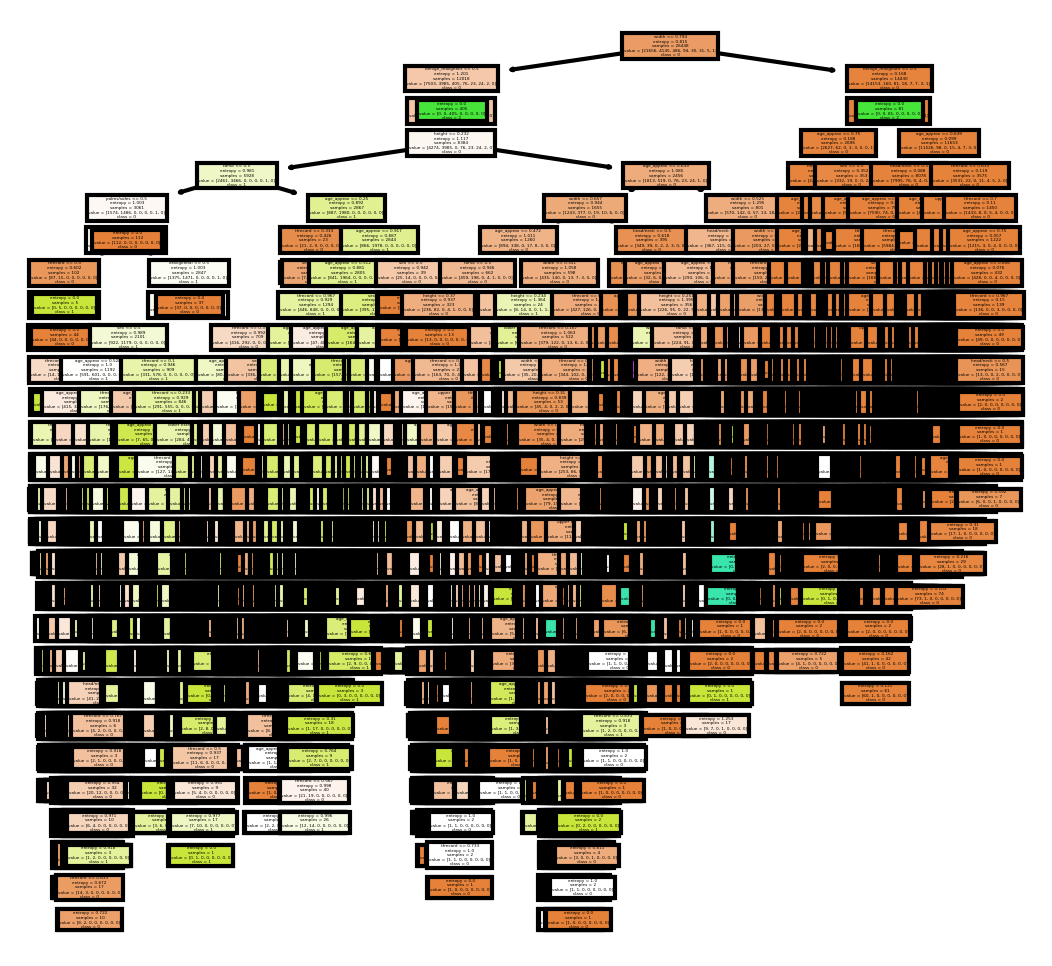

In [124]:
from sklearn import tree
import matplotlib.pyplot as plt


fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = X_new.columns, 
               class_names=['0','1','2','3','4','5','6','7','8'],
               filled = True);

# Comparing the accuracy in a bar chart

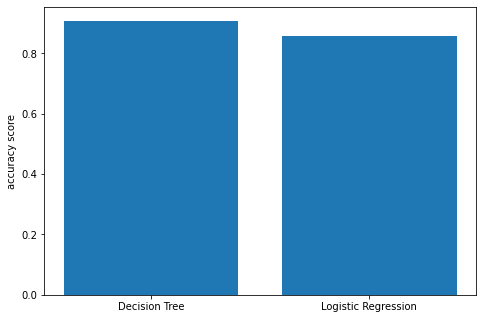

In [60]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
prediction_structure = ['Decision Tree', 'Logistic Regression']
accuracy_scores = [decisionTree_accuracy, logisticRegression_accuracy]
ax.bar(prediction_structure, accuracy_scores, width = 0.8, align='center')
ax.set_ylabel('accuracy score')
plt.show()

##### We can see that the Decision Tree performs better as it has an accuracy score of 90.8% and Logistic Regression has an accuracy score of 85.7%